## Bike Sharing Demand

In [1]:
# Data Fields
    #1.datetime - hourly date + timestamp  
    #2.season -  
        #1 = spring
        #2 = summer
        #3 = fall
        #4 = winter 
    #3.holiday - whether the day is considered a holiday
    #4.workingday - whether the day is neither a weekend nor holiday
    #5.weather - 
        #1: Clear, Few clouds, Partly cloudy, Partly cloudy
        #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    #6.temp - temperature in Celsius
    #7.atemp - "feels like" temperature in Celsius
    #8.humidity - relative humidity
    #9.windspeed - wind speed
    #10.casual - number of non-registered user rentals initiated
    #11.registered - number of registered user rentals initiated
    #12.count - number of total rentals --(Target Feature/Column)
    
#####==========================================================================####
## As we know we have 2 files for Bike Sharing Demand project
  # 1.Train 
  # 2.Test

# 1.So on train data we will train our model and using test data we will predict the output 
# 2.But for any preprocessing the data we will merge the train and test data 

In [2]:
## Import required packages/ library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from datetime import datetime 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

#### Let's Load the data from train and test file 

In [3]:
df_bsd_train = pd.read_csv("train.csv")
df_bsd_test = pd.read_csv("test.csv")

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
#Lets check whether the data loaded are not from train and test file

In [6]:
# From Train File 
# here we can see the data loaded successfully
df_bsd_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# From Test File 
# here we can see the data loaded successfully
df_bsd_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
#Note :  
   #1.Finally the data is load from both the file but in test file we dont't have "casual" and "registered". 
      #let's find out (in further steps) why these features are not available in test data may be they are not relevent features for model.

####  1.Check the info of the both the dataset's

In [9]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df_bsd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
# Train dataset:

#1. Here have total 10886 data points

#2. We have 12 features/columns including our target/labeled column.

#3. we have only datatime releated feature, default it's object type but we have to convert it into datatime format.

#4. we can extract the date and time seperate from the "datetime" feature

#5. out of 12 we have 11 Numeric datatype features and 1 datetime feature.

#6.It looks like we dont have any missing values butwe have to check for NaN/Null values etc.

#7.The Train dataset memory usage is 1020.7+ KB

#################################################################
#Note : Above obervation's are same applied to Test dataset also.
#################################################################

#7.Here is test dataset we have only 6493 data points.

#8.In Test data we dont have few features/columns casual,registered count(Target - we definately will not expect in test data because this is out target feature/column)

#9. the Test dataset memory usage is usage: 456.7+ KB


In [12]:
## Check for Null and Nan values

In [13]:
df_bsd_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
df_bsd_test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [15]:
# Here we can see for both the dataset Train and Test neither we have any missing values nor Nan values.

### Original Databack up

###### Let's first take the copy or backup of original data (Train and Test)
###### here we copy the data just incase in further process we need any thing from default  dataset then we can use it.

In [16]:
df_O_train = df_bsd_train.copy()
df_O_test = df_bsd_test.copy()

In [17]:
## Let's Convert the datatime feature data type from object to datetime datatype
## so that later we can extract the date and time seperately
## We will save the converted and save the values in same column i.e  "datetime"

In [18]:
df_bsd_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
df_bsd_train['datetime'] = pd.to_datetime(df_bsd_train["datetime"])

In [20]:
# Let's check the datatype of  "datetime" feature

In [21]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### Extract Date and time from "datetime" feature

In [22]:
## Lets first extract the date and time and create new Feature 
   ## 1. date
   ## 2.time 
   ## 3.Year
   ## 4.Month

In [23]:
df_bsd_train["Year"] =  df_bsd_train["datetime"].dt.year
df_bsd_train["Month_In_Number"] = df_bsd_train["datetime"].dt.month
df_bsd_train["Month_Title"] = df_bsd_train["datetime"].dt.month_name()
df_bsd_train["Date"] =  df_bsd_train["datetime"].dt.date
df_bsd_train["Day"] =  df_bsd_train["datetime"].dt.day_name()
df_bsd_train["Weeks"] =  df_bsd_train["datetime"].dt.dayofweek
df_bsd_train["TimeIn_24_Hrs"] =df_bsd_train["datetime"].dt.time
df_bsd_train["hours"] = df_bsd_train["datetime"].dt.hour

In [24]:
df_bsd_train["Month_Title"] =df_bsd_train["Month_In_Number"].apply(lambda x : calendar.month_name[x])

In [25]:
timein12hrs=[]
AM_time =[]
PM_time =[]
ampmdict= []
def convert_time_into_12hr(data):
    d = datetime.strptime(f"{data}", "%H:%M:%S")
    timeampm = d.strftime("%I:%M %p")
    time = d.strftime("%I:%M")
    ampm= d.strftime("%p")
    timein12hrs.append(timeampm)
    if ampm.lower() == "am":
        AM_time.append(time)
        PM_time.append(0)
    else:
        AM_time.append(0)
        PM_time.append(time)
        

In [26]:
for item in df_bsd_train["TimeIn_24_Hrs"]:
    convert_time_into_12hr(item)

In [27]:
df_bsd_train["TimeIn12Hrs"] =  timein12hrs
df_bsd_train["TimeInAM"] = AM_time
df_bsd_train["TimeInPM"] = PM_time

In [28]:
df_bsd_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month_In_Number,Month_Title,Date,Day,Weeks,TimeIn_24_Hrs,hours,TimeIn12Hrs,TimeInAM,TimeInPM
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,January,2011-01-01,Saturday,5,00:00:00,0,12:00 AM,12:00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,January,2011-01-01,Saturday,5,01:00:00,1,01:00 AM,01:00,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,January,2011-01-01,Saturday,5,02:00:00,2,02:00 AM,02:00,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,January,2011-01-01,Saturday,5,03:00:00,3,03:00 AM,03:00,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,January,2011-01-01,Saturday,5,04:00:00,4,04:00 AM,04:00,0


In [29]:
## As of now we extract every think we want from datetime feature incase in  further process any thing we have to extract from datetime (from original dataset) then we will definately do but now we can drop it from dataset

#### Drop datetime feature

In [30]:
df_bsd_train.drop(columns=['datetime'],inplace=True)

In [31]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   casual           10886 non-null  int64  
 9   registered       10886 non-null  int64  
 10  count            10886 non-null  int64  
 11  Year             10886 non-null  int64  
 12  Month_In_Number  10886 non-null  int64  
 13  Month_Title      10886 non-null  object 
 14  Date             10886 non-null  object 
 15  Day              10886 non-null  object 
 16  Weeks            10886 non-null  int64  
 17  TimeIn_24_Hr

In [32]:
#ChangedtypeTodatetime = ['TimeIn_24_Hrs','TimeIn12Hrs','TimeInAM','TimeInPM']

In [33]:
#pd.to_datetime(df_bsd_train['TimeIn12Hrs'])

In [34]:
#Note :
#1.As we can see now we have total 20 columns/features we have after extracting the date and time and other things and create new features based on the data extraction

#2.Now our data size incresed to 1.7 MB. Earlier is was in 1020.7 KB only.

## New Features List
#1.Year : This Feature includes the year.Just to know how many years of data we have in current dataset.
#2.Month_In_Number : This Feature includes all the months.
#3.Date : This Feature includes all the short date.
#4.Day :This Feature includes all the days.
#5.Weeks:This Feature includes the weeks number based on the date feature.
#6.TimeIn_24_Hrs : This Feature includes time in 24 hours (Just for reference).
#7.TimeIn12Hrs : This Feature includes time in 12 hours (Just for reference).
#8.TimeInAM : Here we dump Noon time (12 Hr) based on this feature "TimeIn12Hrs".
#9.TimeInPM :  Here we dump Mid Night time (12 Hr) based on this feature "TimeIn12Hrs".

# Exploratory Data Analysis

### Univarient Analysis

### 1.Year

In [35]:
df_bsd_train["Year"].value_counts(normalize=True)

2012    0.501929
2011    0.498071
Name: Year, dtype: float64

In [36]:
#1.Here we can see that we have 2 years of data i.e. 2011 and 2012
#2.As per the counts we cal clear say that the demand is raised in 2012 as compared to 2011. Yeah that demand raised by few numbers only.
#3.So we can say that the business will grow if the demands will get increase.

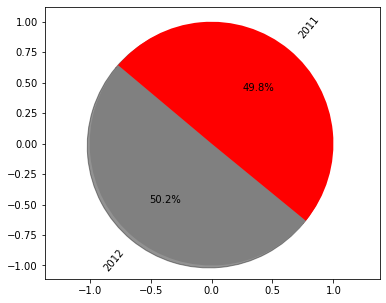

In [37]:
data_year = pd.DataFrame(df_bsd_train["Year"].value_counts(normalize=True).reset_index())
plt.figure(figsize=(6,5))
plt.subplot()
plt.pie(data=data_year,x="Year",autopct="%1.1f%%",labels="index",shadow=True,startangle=140,frame=True,colors=["gray","red"],rotatelabels=True)
plt.axis("equal")
plt.savefig("EDA_img\year.jpg")
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Density'>

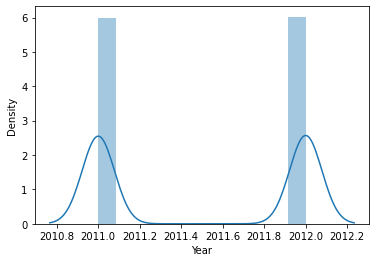

In [38]:
sns.distplot(df_bsd_train['Year'],)

### 2.Holiday


In [39]:
year_2011 =  df_bsd_train['Year'] == 2011

year_2012 =  df_bsd_train['Year'] == 2012

df_month = df_bsd_train['Month_In_Number'] ==1 

holiday_1 = df_bsd_train['holiday'] == 1

holiday_0 = df_bsd_train['holiday'] == 0

df_date_unique = df_bsd_train["Date"].unique()

In [40]:
df_bsd_train["TimeIn_24_Hrs"] = df_bsd_train['TimeIn_24_Hrs'].apply(str).str.replace(',', '')
df_bsd_train["Date"] = df_bsd_train["Date"].apply(str).str.replace(',', '')

In [41]:
#len(df_bsd_train[year_2011 & holiday_1]['Date'].unique())
#len(df_bsd_train[year_2012 & holiday_1]['Date'].unique())
#len(df_bsd_train[year_2011 & holiday_0]['Date'].unique())
#len(df_bsd_train[year_2011]['Date'].unique())
#len(df_bsd_train[year_2012]['Date'].unique())
#len(df_bsd_train[year_2012 & holiday_0]['Date'].unique())

In [42]:
holidayIn2011_2012 = { 
    "Year" : [2011,2012], 
    'Total_Working_DaysIn_Year' : [len(df_bsd_train[year_2011]['Date'].unique()),len(df_bsd_train[year_2012]['Date'].unique())],
    'Holidays_Count' : [len(df_bsd_train[year_2011 & holiday_1]['Date'].unique()), len(df_bsd_train[year_2012 & holiday_1]['Date'].unique())],
    'Not_Holidays' : [len(df_bsd_train[year_2011 & holiday_0]['Date'].unique()), len(df_bsd_train[year_2012 & holiday_0]['Date'].unique())] 
}

In [43]:
holidayIn2011_2012 = pd.DataFrame(holidayIn2011_2012)
holidayIn2011_2012

,Year,Total_Working_DaysIn_Year,Holidays_Count,Not_Holidays
0,2011,228,6,222
1,2012,228,7,221


<Figure size 3600x3600 with 0 Axes>

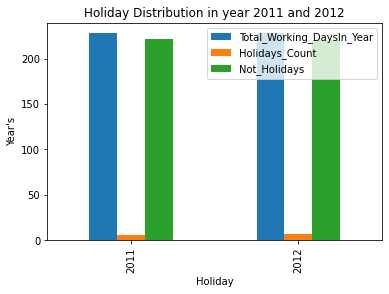

In [44]:
plt.figure(figsize=(50,50))
#plt.subplot(1,2,1)
holidayIn2011_2012.plot(x="Year", y =["Total_Working_DaysIn_Year",'Holidays_Count','Not_Holidays'],kind="bar")
plt.ylabel("Year's")
plt.xlabel("Holiday")
plt.title("Holiday Distribution in year 2011 and 2012")
plt.legend()
plt.savefig("EDA_img\Holiday2011And2012.png")
plt.show()

In [45]:
# From Holiday Feature we can say that,
#1.In every month we have only 19 working days. In year Employee work only 228 days in a year
#2.In above graph we can see that Total Working days,Holiday and Non-holiday counts in  2011 and 2012.
#3.In 2011 there are total 6 holidays and in 2012 there are 7 holidays.
#4.So if we consider the 7 holiday for year then 220 days employee work full time.

### 3.Working Days

In [46]:
df_bsd_train["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [47]:
workingdays_0 = df_bsd_train["workingday"] ==0
workingdays_1 = df_bsd_train["workingday"] ==1

<AxesSubplot:xlabel='workingday', ylabel='Density'>

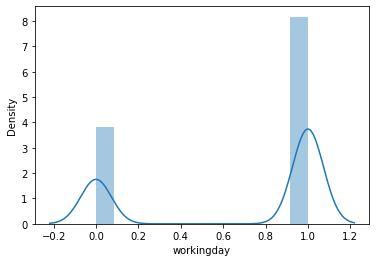

In [48]:
sns.distplot(df_bsd_train['workingday'])

### 4.Weather

##### weather - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [49]:
df_bsd_train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

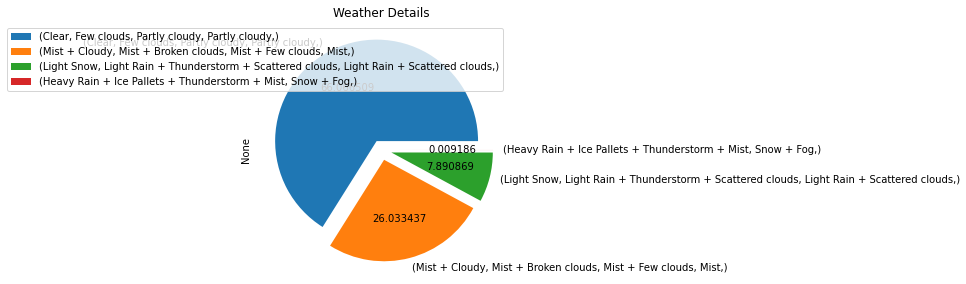

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(121)
pd.DataFrame(df_bsd_train["weather"].map({1 : "Clear, Few clouds, Partly cloudy, Partly cloudy",
                             2 : "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                             3 : "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                             4 : "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})).value_counts(normalize=True).plot(kind="pie",autopct="%2f",explode=[0.1,0.1,0.1,0.1])
plt.legend()
plt.title("Weather Details")
plt.savefig("EDA_img\WeatherInfo.png")

In [51]:
## Weather Feature Observation
#1. Here in weather, the weather are distrubuted in 4 categories i.e :
   #1: Clear, Few clouds, Partly cloudy, Partly cloudy
   #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

#2.From the above observation most of the time in majority the weather was clear in last two years (66.06 %) i.e Clear, Few clouds, Partly cloudy, Partly cloudy 

#3.Then Some time the weather was  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.In average the distrubition was like 26.03%   

#4.The distribution of Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds this weather was 7.89 %

#5.Rarely the weather was bad (0.009%) here we can say it was like Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

##Demand Inference from Weather:

#1.May the when the weather was good then the demand of bike was good as per the expection beacause in bad weather nobody prefer to travel if in case any urgency people prefer  there personal car or cap instead of bike.

#2.Yeah absolutely the weather is also depends of the Season if there is Rain season then absolutely the weather will not too good.so that time also may be it will impact on demand.

<AxesSubplot:xlabel='weather', ylabel='Density'>

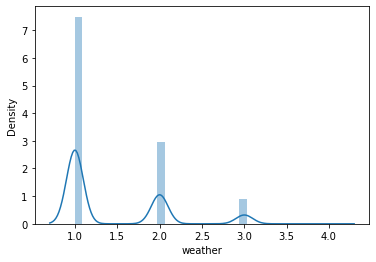

In [52]:
sns.distplot(df_bsd_train["weather"])

### 5.Temperature

###### temp - temperature in Celsius

In [53]:
max_temp_2011 = max(df_bsd_train[year_2011]['temp'])
min_temp_2011 = min(df_bsd_train[year_2011]['temp'])
most_repeated_temp_2011 = df_bsd_train[year_2011]['temp'].mode()[0]

##====================================================

max_temp_2012 = max(df_bsd_train[year_2012]['temp'])
min_temp_2012 = min(df_bsd_train[year_2012]['temp'])
most_repeated_temp_2012 = df_bsd_train[year_2012]['temp'].mode()[0]

<Figure size 720x576 with 0 Axes>

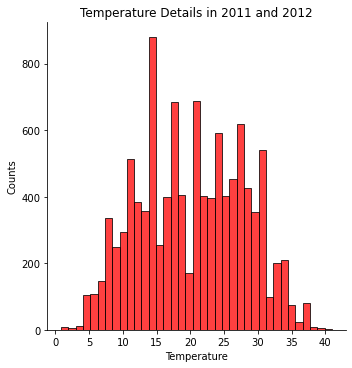

In [54]:
plt.figure(figsize=(10,8))
sns.displot(df_bsd_train['temp'],color='red')
plt.xlabel("Temperature")
plt.ylabel("Counts")
plt.title("Temperature Details in 2011 and 2012")
plt.savefig("temperatur.png")
plt.show()

In [55]:
df_bsd_train[df_bsd_train['temp'] == max_temp_2011]['Month_Title'].unique()
df_bsd_train[df_bsd_train['temp'] == max_temp_2012]['Month_Title'].unique()

array(['July'], dtype=object)

In [56]:
temperature_2011_2012 = {
    "Year" : df_bsd_train['Year'].unique(),
    "Max_Temp" : [max_temp_2011,max_temp_2012],
    "Min_Temp" : [min_temp_2011,min_temp_2012],
    "Most_Repeated_Temp" : [most_repeated_temp_2011,most_repeated_temp_2012]
}

In [57]:
df_temp_2011_2012 = pd.DataFrame(temperature_2011_2012)
df_temp_2011_2012

,Year,Max_Temp,Min_Temp,Most_Repeated_Temp
0,2011,38.54,2.46,18.86
1,2012,41.00,0.82,14.76


<Figure size 2880x2880 with 0 Axes>

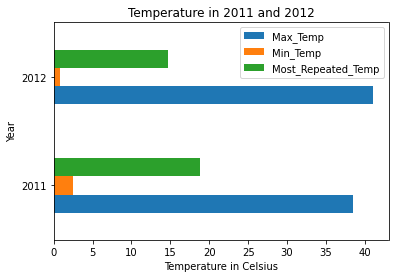

In [58]:
plt.figure(figsize=(40,40))
df_temp_2011_2012.plot(x="Year",y=["Max_Temp","Min_Temp","Most_Repeated_Temp"],kind="barh")
plt.title("Temperature in 2011 and 2012")
plt.ylabel("Year")
plt.xlabel("Temperature in Celsius")
plt.savefig("temperature2011_2012.png")
plt.show()

In [59]:
# Temperature Feature Observation
#1.Here we oberseve the temperature patter in both years 2011 and 2012
#2.In 2011 the Max. Temp is 38.54 , Min. Temp is 2.46 and Most Repeated Temp. in 18.86 . The temperature is in Celsius
#3.In 2012 the Max. Temp is 41.0 , Min. Temp is 0.82 and Most Repeated Temp. in 14.76 . The temperature is in Celsius

<AxesSubplot:xlabel='temp', ylabel='Density'>

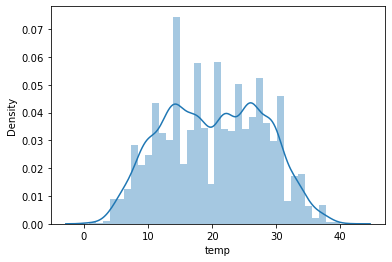

In [60]:
sns.distplot(df_bsd_train['temp'],hist=True)

## 6 .atemp

<AxesSubplot:xlabel='atemp'>

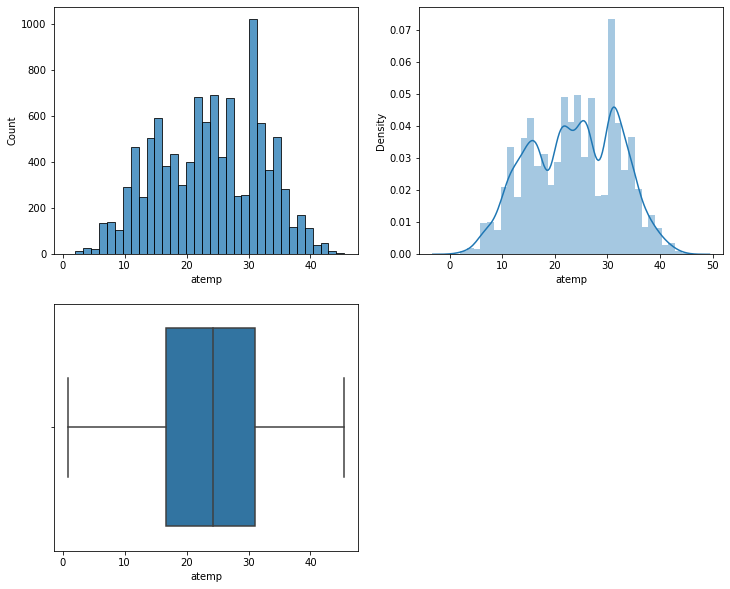

In [61]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(df_bsd_train['atemp'])

plt.subplot(2,2,2)
sns.distplot(df_bsd_train['atemp'],hist=True)


plt.subplot(2,2,3)
sns.boxplot(df_bsd_train['atemp'])


# 7.Humidity

In [62]:
max_humidity_2011 = max(df_bsd_train[year_2011]['humidity'])
min_humidity_2011 = min(df_bsd_train[year_2011]['humidity'])
most_repeated_humidity_2011 = df_bsd_train[year_2011]['humidity'].mode()[0]

##====================================================

max_humidity_2012 = max(df_bsd_train[year_2012]['humidity'])
min_humidity_2012 = min(df_bsd_train[year_2012]['humidity'])
most_repeated_humidity_2012 = df_bsd_train[year_2012]['humidity'].mode()[0]

In [63]:
Humidity_2011_2012 = {
    "Year" : df_bsd_train['Year'].unique(),
    "Max_Humidity" : [max_humidity_2011,max_humidity_2012],
    "Min_Humidity" : [min_humidity_2011,min_humidity_2012],
    "Most_Repeated_Humidity" : [most_repeated_humidity_2011,most_repeated_humidity_2012]
}

In [64]:
Humidity_2011_2012 = pd.DataFrame(Humidity_2011_2012)
Humidity_2011_2012

,Year,Max_Humidity,Min_Humidity,Most_Repeated_Humidity
0,2011,100,0,94
1,2012,100,16,88


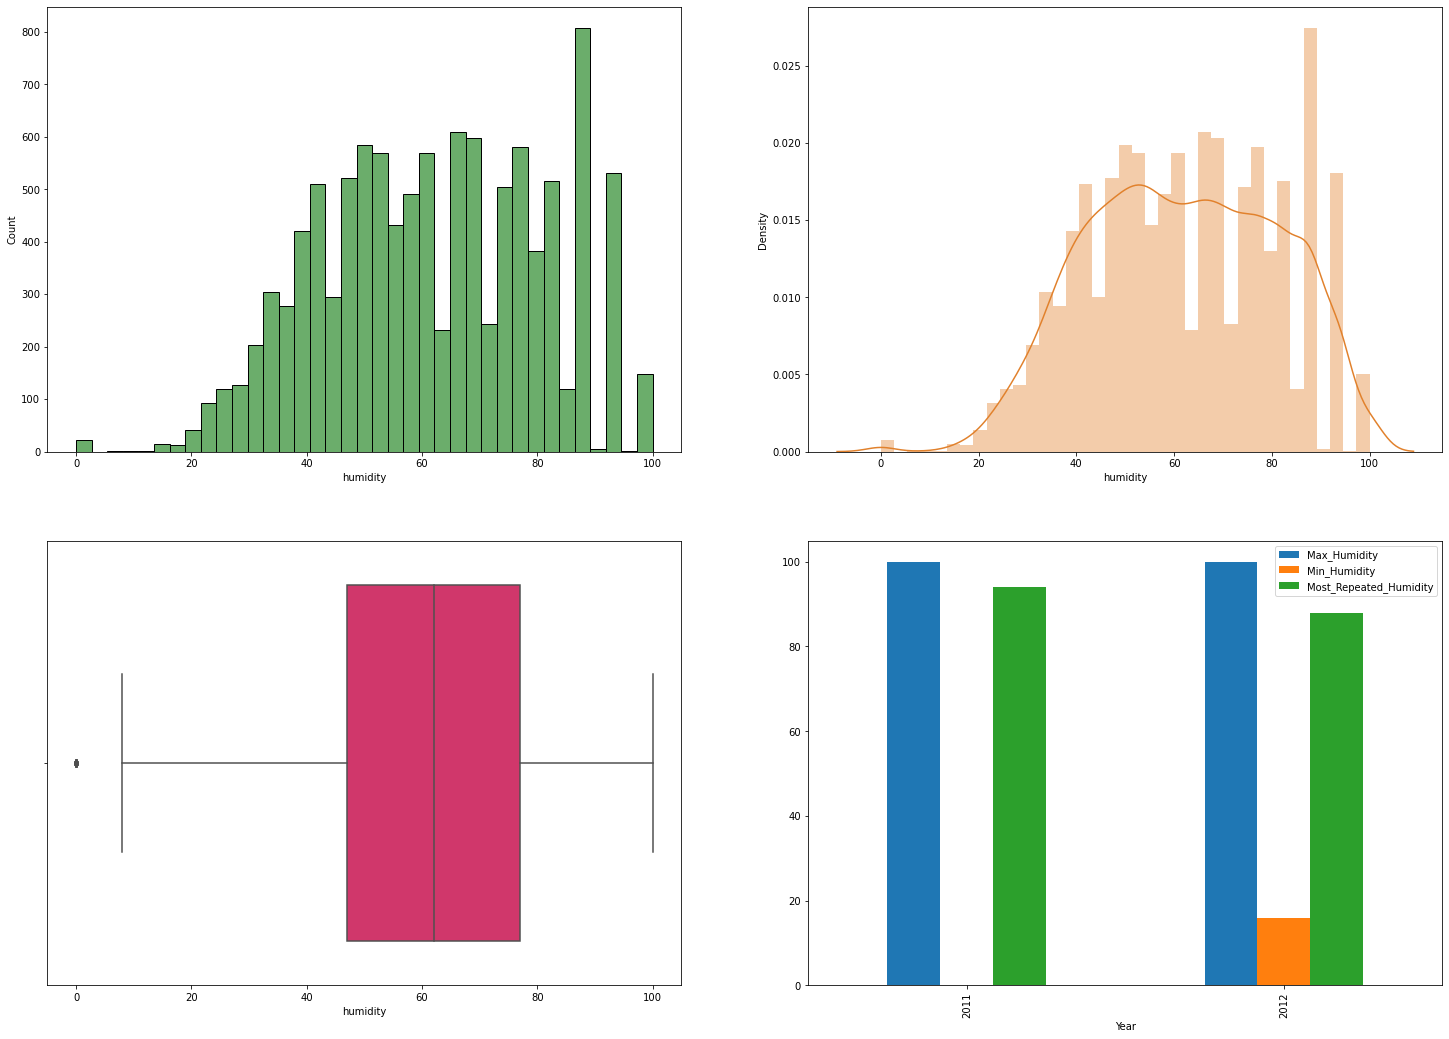

In [65]:
fig, axarr = plt.subplots(2, 2, figsize=(25, 18))
sns.histplot(df_bsd_train['humidity'],color="#3a923a",ax=axarr[0][0])

sns.distplot(df_bsd_train['humidity'],color="#e1812c",ax=axarr[0][1])

sns.boxplot(df_bsd_train['humidity'],color="#e91e63",ax=axarr[1][0])

Humidity_2011_2012.plot(x="Year",y=["Max_Humidity","Min_Humidity","Most_Repeated_Humidity"],kind="bar",ax=axarr[1][1])

plt.savefig("EDA_img\humidity20112012.png")


In [66]:
## Humidity Feature Observation
  # 1.Here we can see the distrubution of humidity in 2 years i.e 2011 and 2012
  # 2.The distribution of humidity is not normally distributed it is tilt on right hand side and again in distribution curve we can see the min. value for humidity may be that is outlier.
  # 3.In box we can easily see that there is an outlier in lower limit 
  # 4.Again we can check the humidity level in both the year's . i.e 2011 and 2012
      # 1.In 2011 the max. humidity goes up to 100 , then Min is 0 (Zero) and them Most of the time the humidity is 94.
      # 2.In 2012 the max. humidity goes up to 100 , then Min is 16 and them Most of the time the humidity is 88.

## 8.windspeed

In [67]:
max_windspeed_2011 = max(df_bsd_train[year_2011]['windspeed'])
min_windspeed_2011 = min(df_bsd_train[year_2011]['windspeed'])
most_repeated_windspeed_2011 = df_bsd_train[year_2011]['windspeed'].mode()[0]

##====================================================

max_windspeed_2012 = max(df_bsd_train[year_2012]['windspeed'])
min_windspeed_2012 = min(df_bsd_train[year_2012]['windspeed'])
most_repeated_windspeed_2012 = df_bsd_train[year_2012]['windspeed'].mode()[0]

In [68]:
Windspeed_2011_2012 = {
    "Year" : df_bsd_train['Year'].unique(),
    "Max_Windspeed" : [max_windspeed_2011,max_windspeed_2012],
    "Min_Windspeed" : [min_windspeed_2011,min_windspeed_2012],
    "Most_Repeated_Windspeed" : [most_repeated_windspeed_2011,most_repeated_windspeed_2012]
}

In [69]:
Windspeed_2011_2012 = pd.DataFrame(Windspeed_2011_2012)
Windspeed_2011_2012

,Year,Max_Windspeed,Min_Windspeed,Most_Repeated_Windspeed
0,2011,56.9969,0.0,0.0
1,2012,47.9988,0.0,0.0


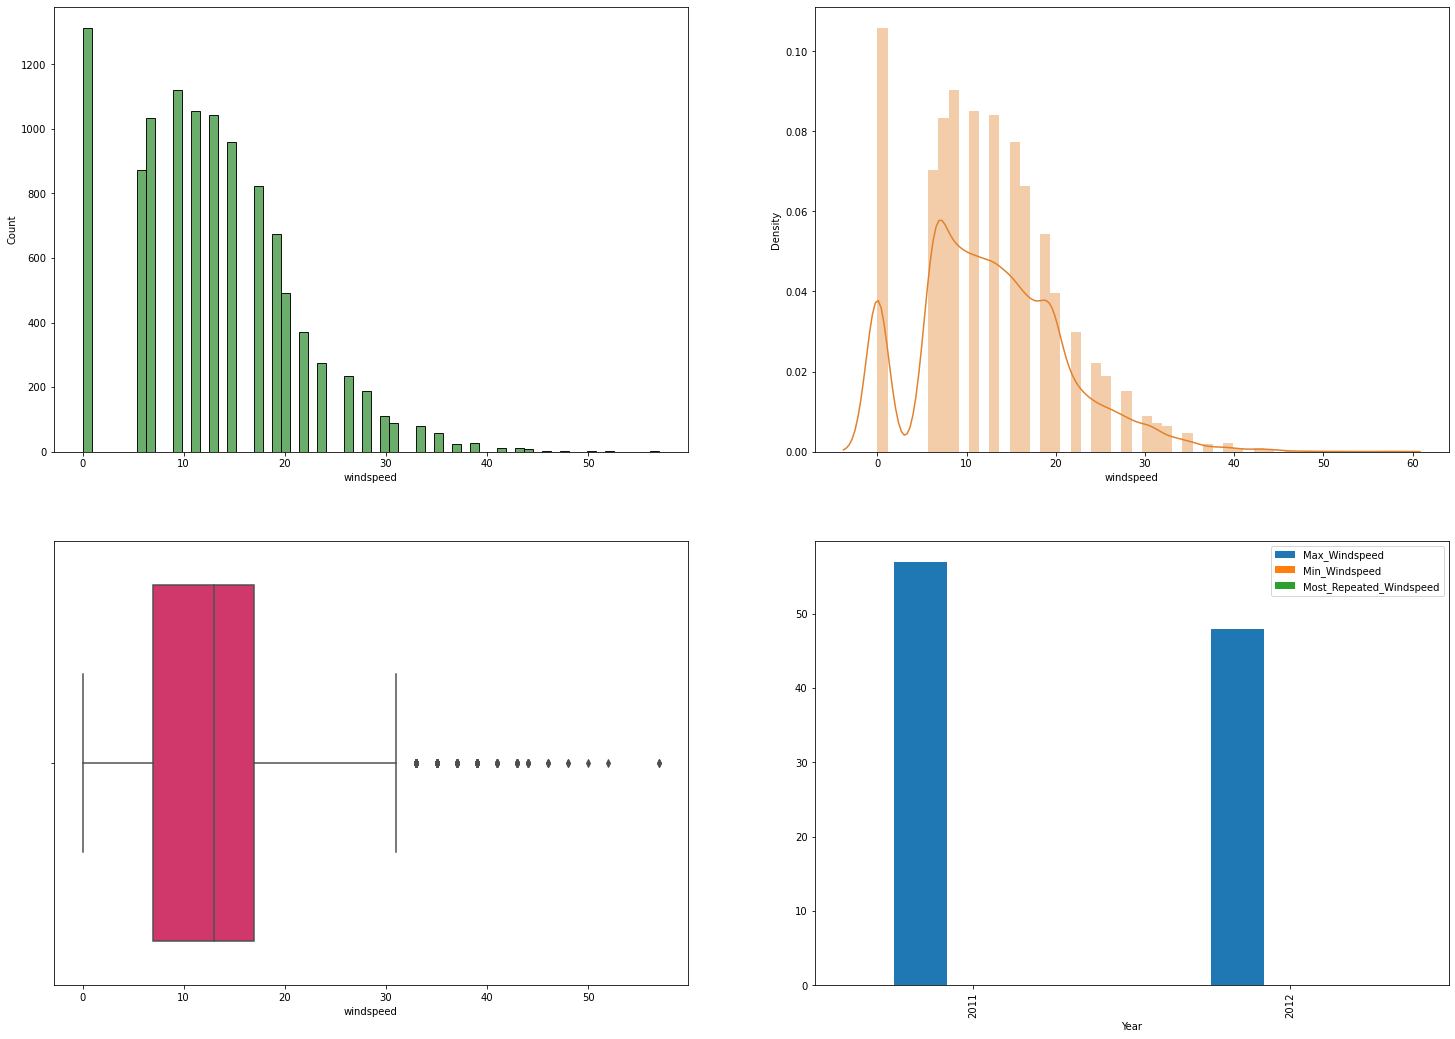

In [70]:
fig, axarr = plt.subplots(2, 2, figsize=(25, 18))
sns.histplot(df_bsd_train['windspeed'],color="#3a923a",ax=axarr[0][0])

sns.distplot(df_bsd_train['windspeed'],color="#e1812c",ax=axarr[0][1])

sns.boxplot(df_bsd_train['windspeed'],color="#e91e63",ax=axarr[1][0])

Windspeed_2011_2012.plot(x="Year",y=["Max_Windspeed","Min_Windspeed","Most_Repeated_Windspeed"],kind="bar",ax=axarr[1][1])

plt.savefig("EDA_img\windspeed20112012.png")


In [71]:
## Windspeed Feature Observation
  # 1.Here we can see the distrubution of Windspeed in 2 years i.e 2011 and 2012
  # 2.The distribution of windspeed is not normally distributed it is tilt on left hand side (majority).
  # 3.In box we can easily see that there are outlier's in upper limit 
  # 4.Again we can check the wind speed in both the year's . i.e 2011 and 2012
      # 1.In 2011 the max. wind speed goes up to 56.9969 , then Min is 0 (Zero) and them Most of the time the wind speed is 0 (Zero).
      # 2.In 2012 the max. wind speed goes up to 47.9988 , then Min is 0 (Zero) and them Most of the time the wind speed is 0 (Zero).

## 9.Season

In [72]:
df_bsd_train["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [73]:
df_bsd_train["Season_Title"]= pd.DataFrame(df_bsd_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }))

<Figure size 1440x1152 with 0 Axes>

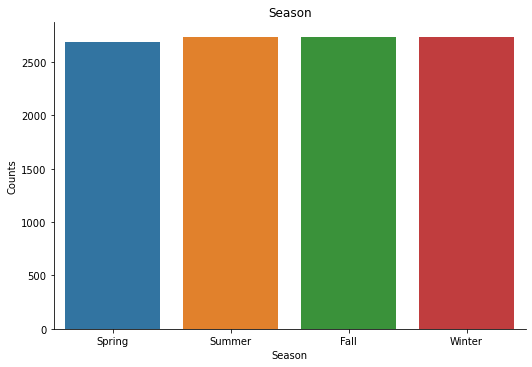

In [74]:
plt.figure(figsize=(20,16))
sns.factorplot(x ='Season_Title',data=df_bsd_train,kind="count",size=5,aspect=1.5)
plt.xlabel("Season")
plt.ylabel("Counts")
plt.title("Season")
plt.savefig("EDA_img\season.jpg")

In [75]:
# WE all know that we have only 4 season i.e Spring, Summer,Fall,Winter ()
#1.From above bar graph we can see the demand is always high in only 3 seasion's i.e Summer,Fall,Winter
#2.In Spring season the demand quite down/low.
#3.So we can conclude based on Season we have to maintain the availability of the bike in that 2 season's

In [76]:
#sns.barplot(data=df_bsd_train,x=df_bsd_train['season'],y=df_bsd_train['count'])

### 10. Day

<AxesSubplot:xlabel='Day'>

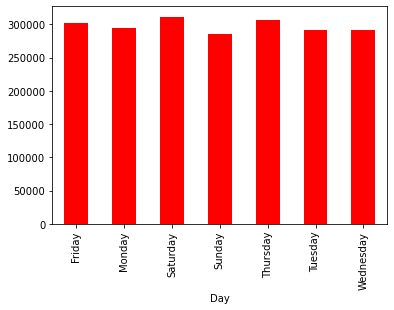

In [77]:
df_bsd_train.groupby(['Day'])["count"].sum().plot.bar(color="red")

In [78]:
## Day Feature Observation (Extracted/Created from datetime feature)
  # 1.we can see that for all days in a week there is a demand of vehicles
  # 2.Even there is a demand  but there are few variation's also like on Thrusday and Saturday there is a high demand as compared to other days.
  # 3.After Thrusday and Saturday there is an high demand on Friday also.
  # 4.Again we can easily observe that from graph there is some stability/ constant demand on Monday,Tuesday and Wednesday.
  # 5.On Sunday we dont't have that mush demand as compared with other days.Beacause sunday is weekend may be for most of the people.

### 11. Month (Month_title)

<AxesSubplot:xlabel='Month_Title'>

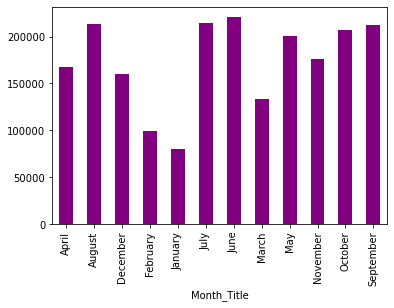

In [79]:
df_bsd_train.groupby(['Month_Title'])["count"].sum().plot.bar(color="purple")

In [80]:
## Month Feature Observation
 # 1.There is a good demand of Bike ride with in year
 # 2.But we can see the fluctuation in every month in a year.
 # 3.Even after fluctuation of demand in month but we can easily see that there are few month in a year where there is a good demand
 #    and that months are May,June,July,August,September,October.
 # 4.May be in  the above months there is a good weather

## Bi-Varient Analysis

### 1.temp Vs count (Target Feature)

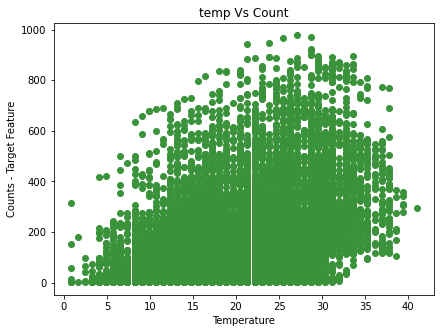

In [81]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['temp'],y=df_bsd_train["count"],color="#3a923a")
plt.xlabel("Temperature")
plt.ylabel("Counts - Target Feature")
plt.title("temp Vs Count")
plt.savefig("EDA_img\TempvsCount.png")
plt.show()

In [82]:
# Relationship between Temp Feature Vs Count (Target Feature)
 # 1.we can see that in relationship between both the feature, and based on that we can say that as temperature increase the demand of bike increase at certain point.
 # 2.As temperature increases the demand also increases
 # 3. So we can say that both features have linearly co-related or co-relation between these featuers.

### 2.temp Vs humidity

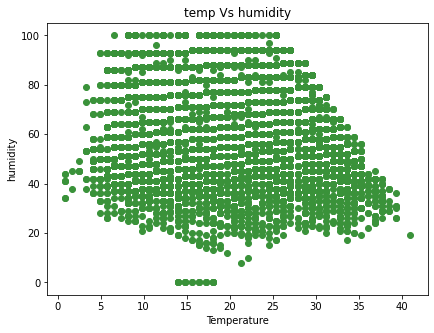

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['temp'],y=df_bsd_train["humidity"],color="#3a923a")
plt.xlabel("Temperature")
plt.ylabel("humidity")
plt.title("temp Vs humidity")
plt.savefig("EDA_img\Tempvshumidity.png")
plt.show()

In [84]:
## Relationship between temp Vs humidity

# 1.Here we can clearly say that both features are Not linearly  co-related
# 2.Because if temperature increases then the humidity will reamin same.
# 3.So there is no relation between two features.

### 3.temp Vs windspeed

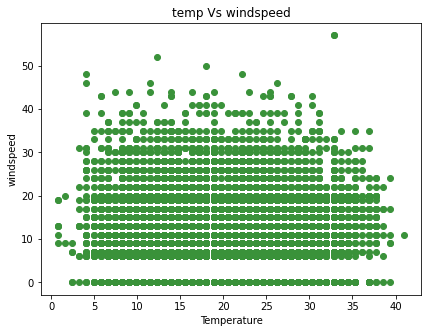

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['temp'],y=df_bsd_train["windspeed"],color="#3a923a")
plt.xlabel("Temperature")
plt.ylabel("windspeed")
plt.title("temp Vs windspeed")
plt.savefig("EDA_img\Tempvswindspeed.png")
plt.show()

In [86]:
## Relationship between temp Vs windspeed
# 1. This is not linearly corelate with each other. 

### 4. atemp Vs count

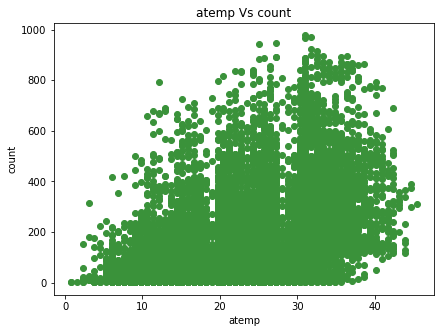

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['atemp'],y=df_bsd_train["count"],color="#3a923a")
plt.xlabel("atemp")
plt.ylabel("count")
plt.title("atemp Vs count")
plt.savefig("atempvscount.png")
plt.show()

In [88]:
## Relationship between atemp Vs count
 #1.In this case we can cleary see that it is kind-of have a linearly co-relation between two feature's

### 5. humidity vs counts

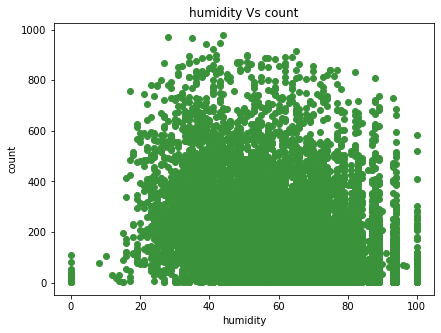

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['humidity'],y=df_bsd_train["count"],color="#3a923a")
plt.xlabel("humidity")
plt.ylabel("count")
plt.title("humidity Vs count")
plt.savefig("EDA_img\humidityvscount.png")
plt.show()

### 6.windspeed vs counts

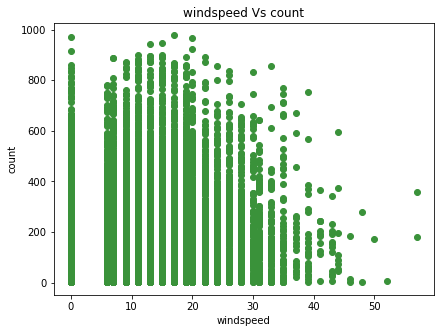

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['windspeed'],y=df_bsd_train["count"],color="#3a923a")
plt.xlabel("windspeed")
plt.ylabel("count")
plt.title("windspeed Vs count")
plt.savefig("EDA_img\windspeedvscount.png")
plt.show()

### 7. Hours vs counts

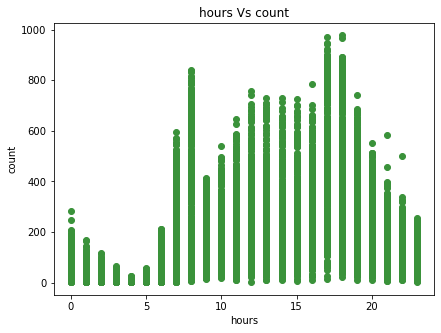

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x =df_bsd_train['hours'],y=df_bsd_train["count"],color="#3a923a")
plt.xlabel("hours")
plt.ylabel("count")
plt.title("hours Vs count")
plt.savefig("EDA_img\hoursvscount.png")
plt.show()

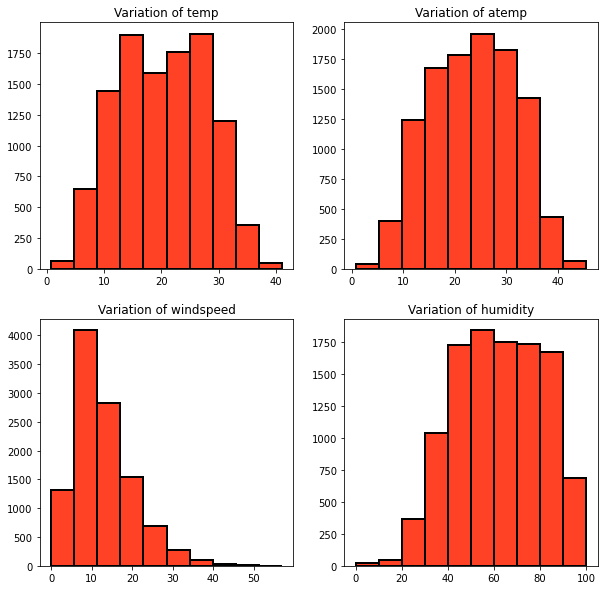

In [92]:
# can also be visulaized using histograms for all the continuous variables.
#df_bsd_train.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df_bsd_train,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df_bsd_train,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_bsd_train,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_bsd_train,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

### Data Cleaning / Pre- Processing


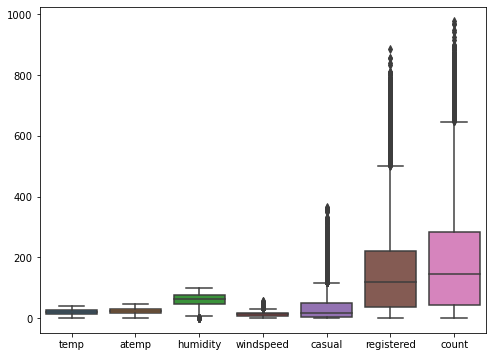

In [93]:
sns.boxplot(data=df_bsd_train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(8,6)

In [94]:
## From above boxplot we can clearly see that we have outliers in few features that are
#1.humidity
#2.windspeed
#3.casual
#4.registered
#5.count (Target Feature)
    
    

In [95]:
### This function Is use to Calculate/find out the Ouliers Limit and it will return the IQR_75% ,IQR_25% ,IQR ,Upper Limit And Lower Limit details of Outlier
### The values/output will returns in DataFrame format
def calculate_IQR75_25IQR_IQR(data_DF,feature):
    percentile75 = data_DF[feature].quantile(0.75)
    percentile25 = data_DF[feature].quantile(0.25)
    IQR = percentile75 - percentile25
    Upper_Limit = percentile75 + 1.5 * IQR
    Lower_Limit = percentile25 - 1.5 * IQR
    data_dict = {"percentile75" :percentile75,
                 "percentile25" :percentile25,
                 "IQR" :IQR,
                 "UpperLimit" :Upper_Limit,
                 "LowerLimit":Lower_Limit}
    return pd.DataFrame(data_dict,index=[0])

In [96]:
def capping_Outliers(data_df,feature,IQR_Data):
    data_df[feature] = np.where(
        data_df[feature] > IQR_Data['UpperLimit'][0],
        IQR_Data['UpperLimit'][0],
        np.where(
            data_df[feature] < IQR_Data['LowerLimit'][0],
            IQR_Data['LowerLimit'][0],
            data_df[feature]            
        )
    )    

In [97]:
### This function Plot Box Plot and Distplot
def plotBoxPlot_And_DistPlot(dataset,feature):
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    plt.title(f"{feature}")
    sns.boxplot(dataset[feature],color="red")
    
    plt.subplot(2,2,2)
    plt.title(f"{feature}")
    sns.distplot(dataset[feature],color="red",hist=True)
    
    plt.show()

In [98]:
### This function Plot Box Plot and Distplot But this we will use after the adjustment of Outliers and Will compare the Before And After graph/plot
def Compare_Before_After_BoxPlot(Original_DF,New_DF,feature):
    plt.figure(figsize=(25,12))
    plt.subplot(2,2,1)
    plt.title(f"With Outliers in {feature}")
    sns.boxplot(Original_DF[feature],color="red")
    
    plt.subplot(2,2,2)
    plt.title(f"With Outliers in {feature}")
    sns.distplot(Original_DF[feature],color="red")
    
    plt.subplot(2,2,3)
    plt.title(f"Without Outliers in {feature}")
    sns.boxplot(New_DF[feature],color="green")
    
    
    plt.subplot(2,2,4)
    plt.title(f"Without Outliers in {feature}")
    sns.distplot(New_DF[feature],color="green")
    
    plt.show()

## Lets remove the Outliers from all the features

### 1.humidity

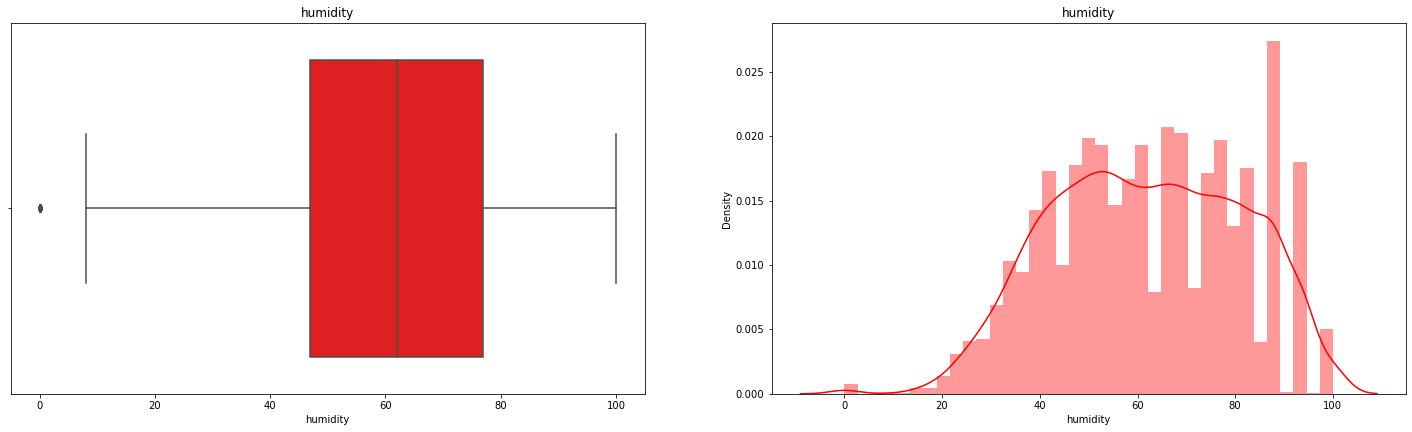

In [99]:
plotBoxPlot_And_DistPlot(df_bsd_train,'humidity')

In [100]:
IQR_Info_humidity =  calculate_IQR75_25IQR_IQR(df_bsd_train,"humidity")
IQR_Info_humidity

,percentile75,percentile25,IQR,UpperLimit,LowerLimit
0,77.0,47.0,30.0,122.0,2.0


In [101]:
capping_Outliers(df_bsd_train,'humidity',IQR_Info_humidity)

<AxesSubplot:xlabel='humidity'>

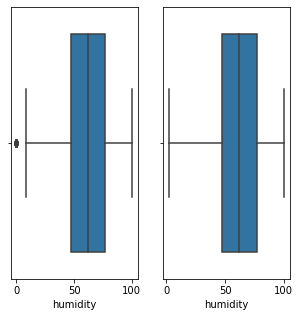

In [102]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.boxplot(df_O_train['humidity'])

plt.subplot(1,2,2)
sns.boxplot(df_bsd_train['humidity'])


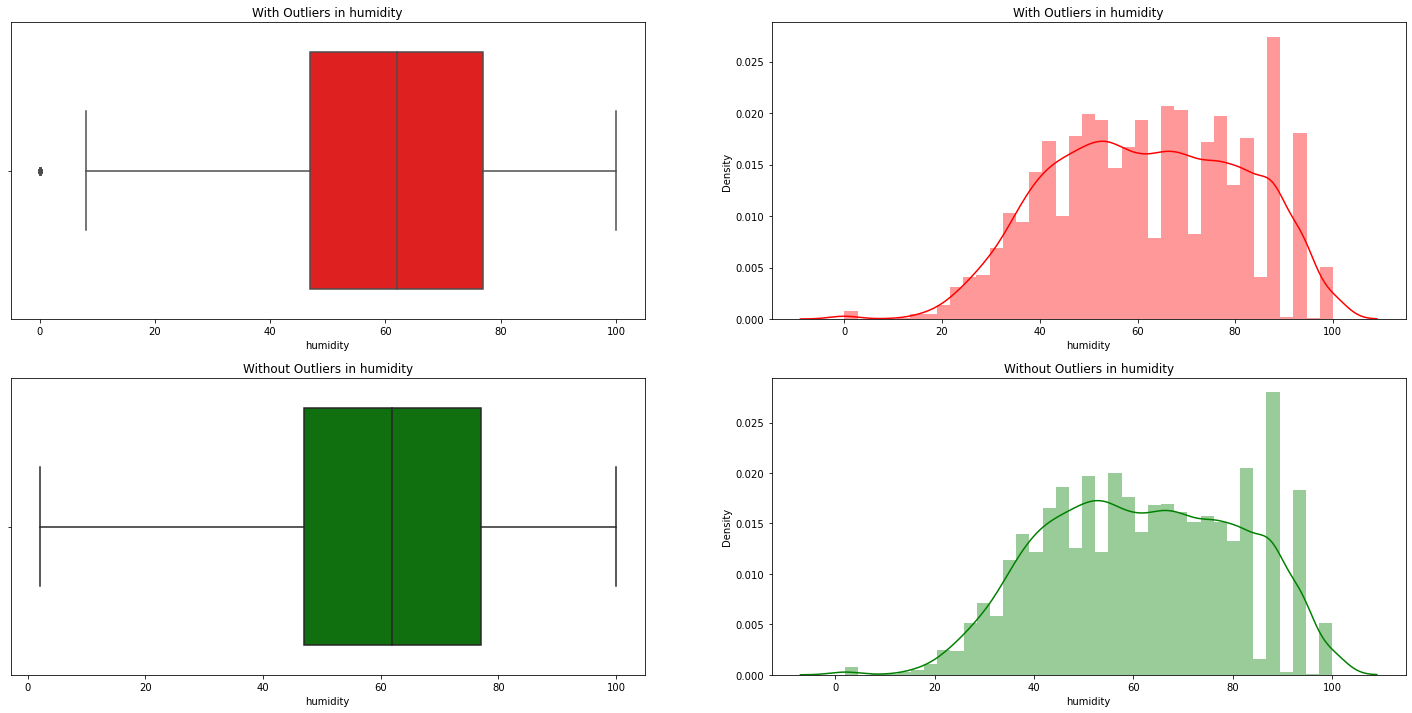

In [103]:
Compare_Before_After_BoxPlot(df_O_train,df_bsd_train,'humidity')

### 2.windspeed

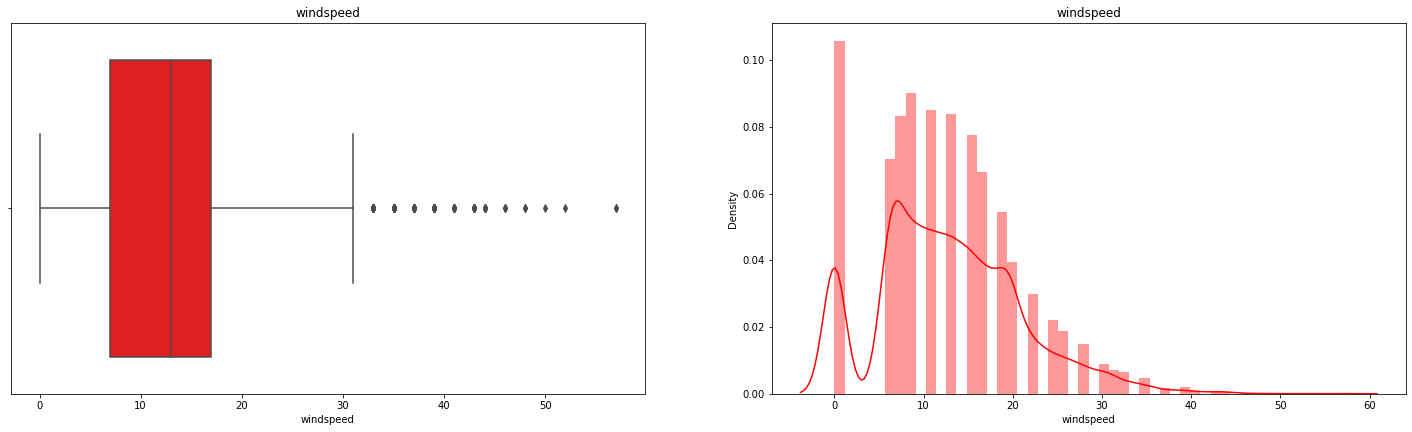

In [104]:
plotBoxPlot_And_DistPlot(df_bsd_train,'windspeed')

In [105]:
# Here we can easily say that there are few outliers in Upper Limit.

In [106]:
## Let's Adjust the outliers using IQR.
IQR_Info_windspeed=calculate_IQR75_25IQR_IQR(df_bsd_train,'windspeed')
IQR_Info_windspeed

,percentile75,percentile25,IQR,UpperLimit,LowerLimit
0,16.9979,7.0015,9.9964,31.9925,-7.9931


In [107]:
## Here we are ajusting the outlier based on the IQR values (percentile_75,percentile_25,UpperLimit,Lower Limit)
capping_Outliers(df_bsd_train,"windspeed",IQR_Info_windspeed)

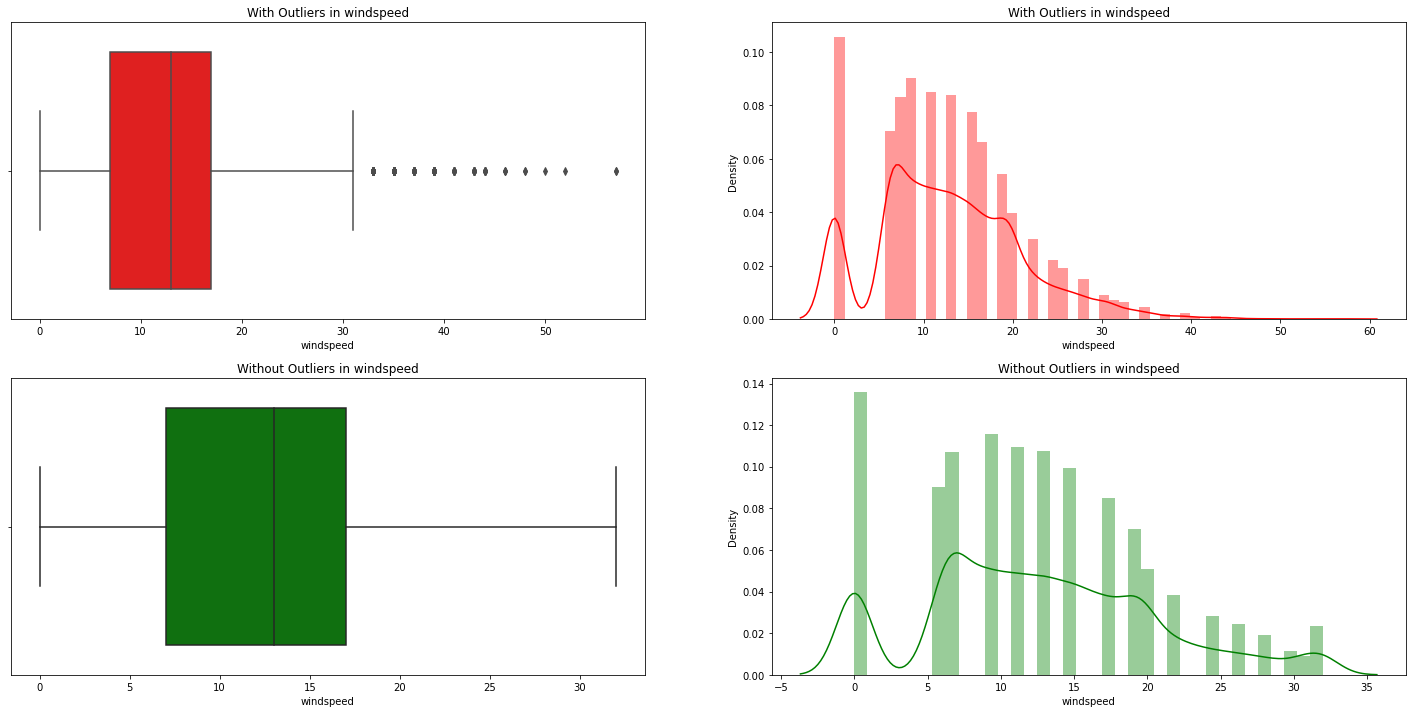

In [108]:
#Comparing the graph after adjustment of outliers.
 # 1.After adjustment of outliers there are no outliers.
Compare_Before_After_BoxPlot(df_O_train,df_bsd_train,'windspeed')

### 3.casual

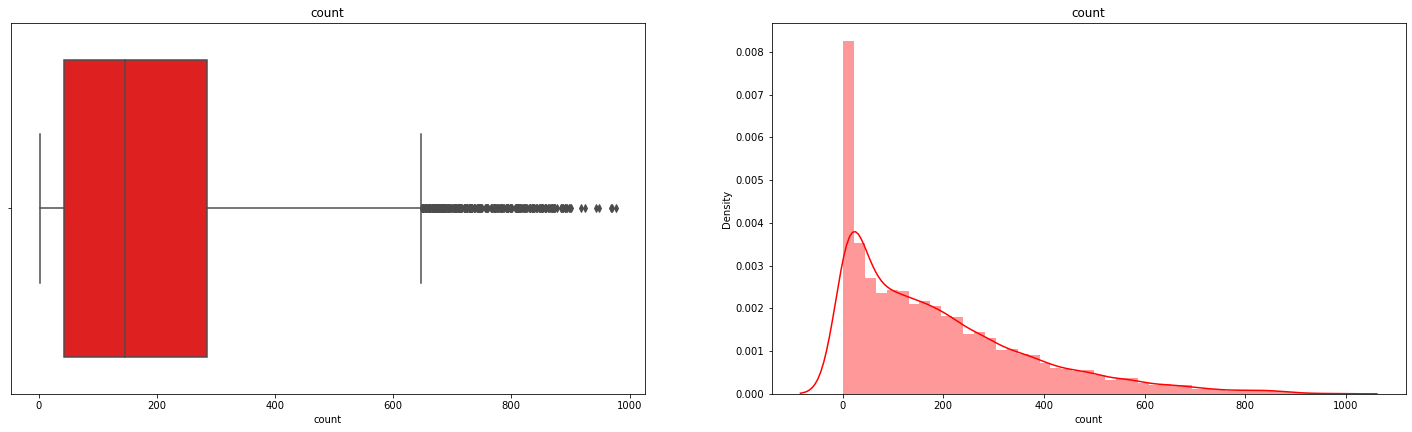

In [109]:
plotBoxPlot_And_DistPlot(df_bsd_train,'count')

In [110]:
IQR_Info_Count = calculate_IQR75_25IQR_IQR(df_bsd_train,'count')
IQR_Info_Count

,percentile75,percentile25,IQR,UpperLimit,LowerLimit
0,284.0,42.0,242.0,647.0,-321.0


In [111]:
capping_Outliers(df_bsd_train,'count',IQR_Info_Count)

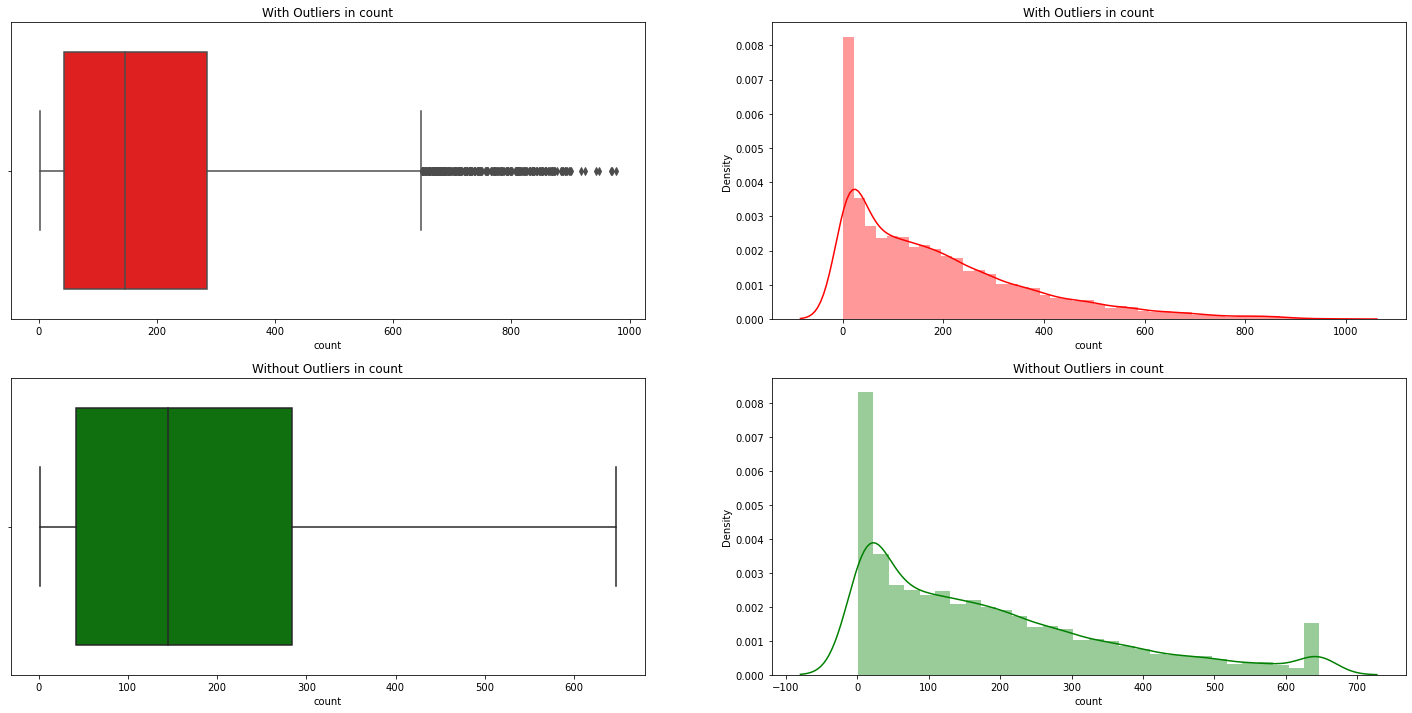

In [112]:
Compare_Before_After_BoxPlot(df_O_train,df_bsd_train,'count')

In [113]:
df_bsd_train['Month_In_Number'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: Month_In_Number, dtype: int64

In [114]:
df_bsd_train = df_bsd_train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Year','Month_In_Number','Day','hours','count']]
df_bsd_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month_In_Number,Day,hours,count
0,1,0,0,1,9.84,14.395,81.0,0.0,2011,1,Saturday,0,16.0
1,1,0,0,1,9.02,13.635,80.0,0.0,2011,1,Saturday,1,40.0
2,1,0,0,1,9.02,13.635,80.0,0.0,2011,1,Saturday,2,32.0
3,1,0,0,1,9.84,14.395,75.0,0.0,2011,1,Saturday,3,13.0
4,1,0,0,1,9.84,14.395,75.0,0.0,2011,1,Saturday,4,1.0


In [115]:
categoricalFeatures= ['season','holiday','workingday','weather','Year','Month_In_Number','Day','hours']
categoricalFeatures

['season',
 'holiday',
 'workingday',
 'weather',
 'Year',
 'Month_In_Number',
 'Day',
 'hours']

#### Let's encode categorical feature using one Hot encoding tech.

In [116]:
transform_catFeatures = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),categoricalFeatures)
],remainder='passthrough',verbose_feature_names_out=False)

In [117]:
transform_catFeatures.fit(df_bsd_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'Year', 'Month_In_Number', 'Day', 'hours'])],
                  verbose_feature_names_out=False)

In [118]:
new_df = pd.DataFrame(transform_catFeatures.fit_transform(df_bsd_train),columns=transform_catFeatures.get_feature_names_out())

In [119]:
new_df.head()

,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4,Year_2012,Month_In_Number_2,Month_In_Number_3,Month_In_Number_4,Month_In_Number_5,Month_In_Number_6,Month_In_Number_7,Month_In_Number_8,Month_In_Number_9,Month_In_Number_10,Month_In_Number_11,Month_In_Number_12,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,hours_1,hours_2,hours_3,hours_4,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23,temp,atemp,humidity,windspeed,count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,81.0,0.0,16.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.02,13.635,80.0,0.0,40.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.02,13.635,80.0,0.0,32.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,75.0,0.0,13.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,75.0,0.0,1.0


#### Split into Dependent and Independent Variable

In [120]:
X = new_df.drop(columns=['count'])
y = new_df[['count']]

In [121]:
30/ 100 * X.shape[0]

3265.7999999999997

#### Let's split the data into train and test data

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Let's scale the data using MinMax Scaler

In [123]:
scaler_min_max = MinMaxScaler()

In [124]:
scaler_min_max.fit(X_train)

MinMaxScaler()

In [125]:
X_train_scaled = scaler_min_max.fit_transform(X_train)
X_test_scaled = scaler_min_max.transform(X_test)

In [126]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

#### Linear Regression Model

In [127]:
lr_model = LinearRegression()

In [128]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [129]:
lr_model.predict(X_test_scaled)

array([[ 233.  ],
       [  18.25],
       [ 334.  ],
       ...,
       [ 278.25],
       [ 489.75],
       [-209.5 ]])

In [130]:
y_test['LR_Pred'] = lr_model.predict(X_test_scaled)

In [131]:
y_test.head()

,count,LR_Pred
3133,127.0,233.00
5786,13.0,18.25
5224,163.0,334.00
8953,233.0,250.00
8054,222.0,199.00


In [132]:
from sklearn.metrics import r2_score

In [133]:
r2_score(y_test['count'],y_test['LR_Pred'])

0.6904586133074134

In [135]:
Square_error = (y_test['count'] - y_test['LR_Pred']) ** 2

# Find mean square error

Error_mean = Square_error.mean()

Error_mean
    
import math
RMSE_LR = math.sqrt(Error_mean)


print("Difference between actual and predicted value RMSE", RMSE_LR)




Difference between actual and predicted value RMSE 95.65773762297725


In [136]:
error = y_test['count'] - y_test['LR_Pred']

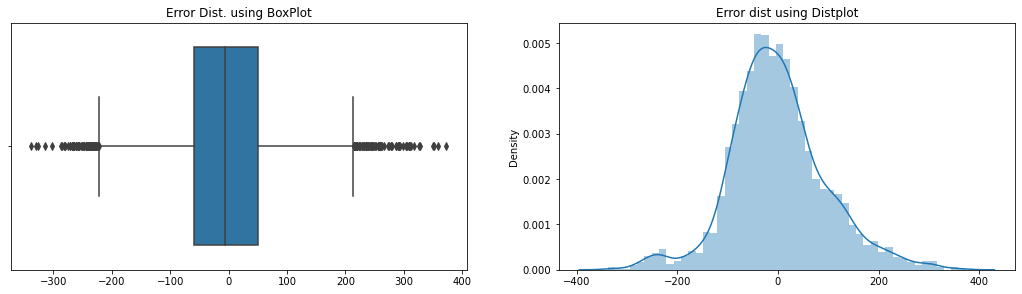

In [137]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('Error Dist. using BoxPlot')
sns.boxplot(error)

plt.subplot(2,2,2)
plt.title('Error dist using Distplot')
sns.distplot(error)

plt.show()

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test['count'],y_test['LR_Pred'])

72.03222596448255

In [1]:
### Let's tune this model.
### Work in progress.